## **Task 5: Understanding the concept of bias and varience**


### **🔹 What This Dataset Represents?**
- The **true relationship** is a **quadratic function**:  

  $
  y = 2X^2 + 3X + 5 + \text{noise}
  $
  
- The **noise** added simulates real-world data, making the problem more realistic.




## **Train the model with different complexities**

### **1. Using Linear regression to train the current model**

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [51]:
#import the dataset
df = pd.read_csv("sample_bias_variance.csv")
X = df[['X']]
y = df[['y']]

In [52]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Train a simple Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [54]:
# Predictions
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

In [55]:
# Calculate Errors
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

In [56]:
print(f"📉 Linear Regression (Underfitting) - Train MSE: {mse_train:.4f}, Test MSE: {mse_test:.4f}")

📉 Linear Regression (Underfitting) - Train MSE: 269.6914, Test MSE: 227.4131


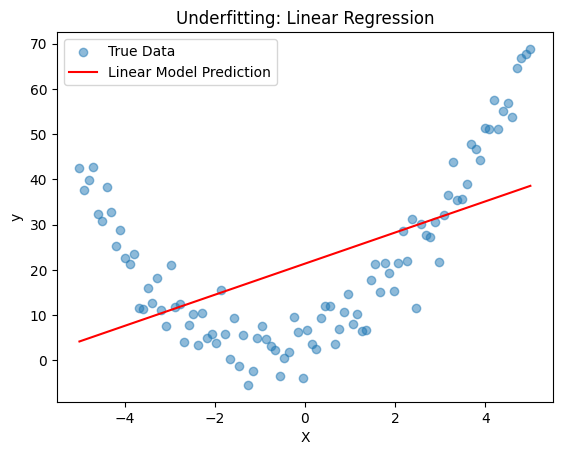

In [57]:
# Plot the results
plt.scatter(X, y, label="True Data", alpha=0.5)
plt.plot(X, linear_model.predict(X), color="red", label="Linear Model Prediction")
plt.title("Underfitting: Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### **Linear regression cannot capture the quadratic trend, leading to high bias (underfitting).**

### **2. Using High degree Ploynomial regression to train the current model**

In [83]:
# Create high-degree polynomial features (Degree = 8)
poly = PolynomialFeatures(degree=8)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)


In [84]:
# Train Polynomial Regression Model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

LinearRegression()

In [85]:
# Predictions
y_pred_train_poly = poly_model.predict(X_poly_train)
y_pred_test_poly = poly_model.predict(X_poly_test)

In [86]:
# Calculate Errors
mse_train_poly = mean_squared_error(y_train, y_pred_train_poly)
mse_test_poly = mean_squared_error(y_test, y_pred_test_poly)

In [87]:
print(f"📈 Polynomial Regression (Overfitting) - Train MSE: {mse_train_poly:.4f}, Test MSE: {mse_test_poly:.4f}")

📈 Polynomial Regression (Overfitting) - Train MSE: 19.7235, Test MSE: 15.5491


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


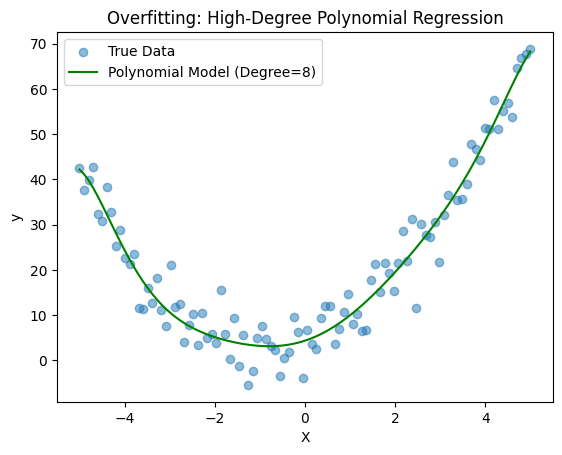

In [88]:
# Plot the results
plt.scatter(X, y, label="True Data", alpha=0.5)
plt.plot(np.sort(X, axis=0), poly_model.predict(poly.transform(np.sort(X, axis=0))), color="green", label="Polynomial Model (Degree=8)")
plt.title("Overfitting: High-Degree Polynomial Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### **This model has low bias but very high variance – it fits training data very well but fails to generalize to new data.**

### **3. Best Fit (Balanced Bias-Variance Tradeoff)**

In [64]:
# Create polynomial features (Degree = 2, which matches the true function)
poly_best = PolynomialFeatures(degree=2)
X_poly_train_best = poly_best.fit_transform(X_train)
X_poly_test_best = poly_best.transform(X_test)

In [65]:
# Train Polynomial Regression Model
best_model = LinearRegression()
best_model.fit(X_poly_train_best, y_train)

LinearRegression()

In [66]:
# Predictions
y_pred_train_best = best_model.predict(X_poly_train_best)
y_pred_test_best = best_model.predict(X_poly_test_best)


In [67]:
# Calculate Errors
mse_train_best = mean_squared_error(y_train, y_pred_train_best)
mse_test_best = mean_squared_error(y_test, y_pred_test_best)

In [68]:
print(f"✅ Best Fit Model - Train MSE: {mse_train_best:.4f}, Test MSE: {mse_test_best:.4f}")

✅ Best Fit Model - Train MSE: 21.5064, Test MSE: 15.4908


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


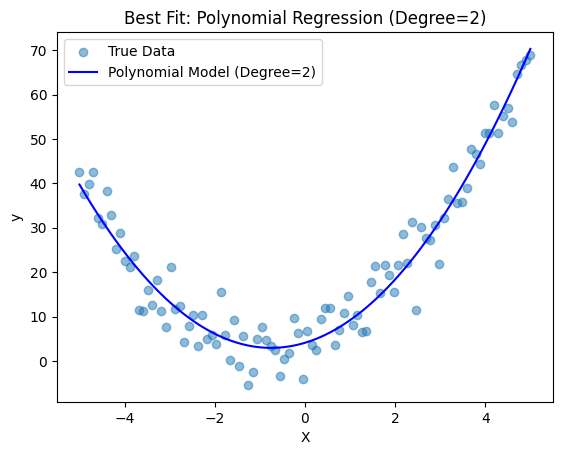

In [69]:
# Plot the results
plt.scatter(X, y, label="True Data", alpha=0.5)
plt.plot(np.sort(X, axis=0), best_model.predict(poly_best.transform(np.sort(X, axis=0))), color="blue", label="Polynomial Model (Degree=2)")
plt.title("Best Fit: Polynomial Regression (Degree=2)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()